<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/21a_Titanic_%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거
import sys
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME']='mjkimcs'
os.environ['KAGGLE_KEY']='7d10c5f08a131943194c8cd3e4aa633f'

In [ ]:
!kaggle competitions download -c titanic
!unzip '*.zip'

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
!ls

gender_submission.csv  test.csv			titanic_submission2.csv
sample_data	       titanic_submission1.csv	train.csv


(참고)로컬PC에서 csv파일 가져오기  
  
from google.colab import files  
uploaded = files.upload()  
  
import io  
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))  
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.columns[0], train.columns[3:5]

('PassengerId', Index(['Name', 'Sex'], dtype='object'))

In [ ]:
train[5:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
# train, test 행의 갯수
ntrain = train.shape[0]
ntest = test.shape[0]

# naming
y_train = train['Survived'].values
passId = test['PassengerId']

# train, test 병합
data = pd.concat((train, test))

# 병합한 data의 크기
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

train.csv에서 342명이 살아남고, 549명이 사망했다.

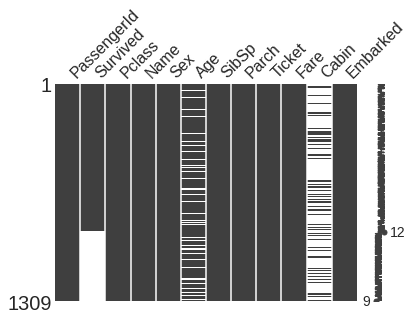

In [ ]:
missingno.matrix(data, figsize = (6,4))

In [ ]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
data.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [ ]:
data.isna().any().any()

True

In [ ]:
data.PassengerId.isna().any()

False

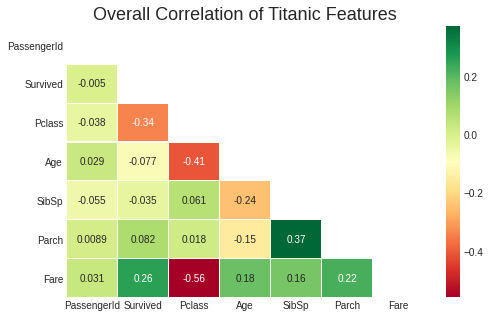

In [ ]:
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 5))
plt.title('Overall Correlation of Titanic Features', fontsize=18)

sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

0    549
1    342
Name: Survived, dtype: int64


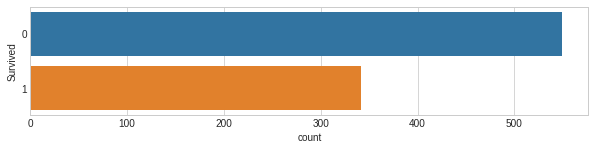

In [ ]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

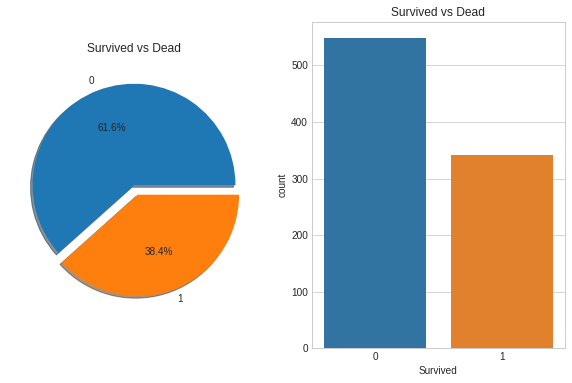

In [ ]:
f,ax=plt.subplots(1, 2, figsize=(10, 6))

train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived vs Dead')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived vs Dead')

plt.show()

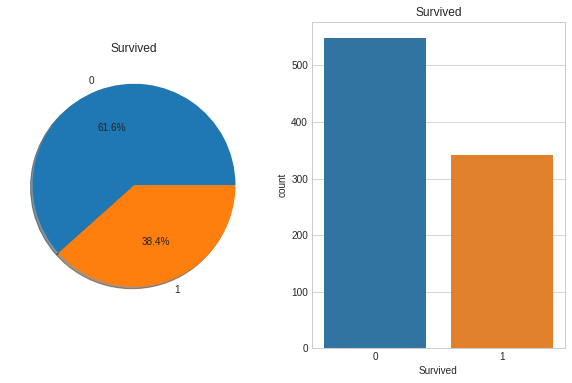

In [ ]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(10, 6))
    train[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')

(참고) 파이차트 간격두기  
  
train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique(), autopct='%1.1f%%', ax=ax[0], shadow=True)

In [ ]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [ ]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


1등급 객실은 생존자가 많고, 3등급 객실은 사망자가 3배 이상 많다.

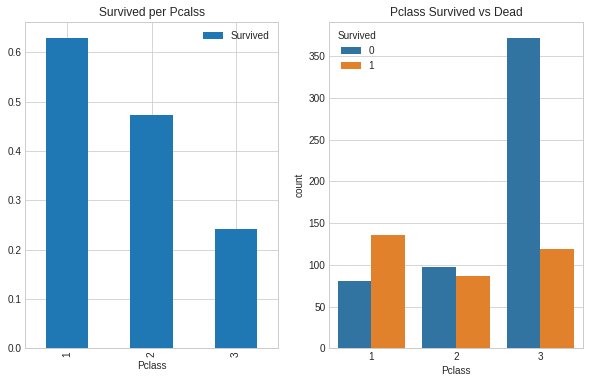

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass Survived vs Dead')
plt.show()

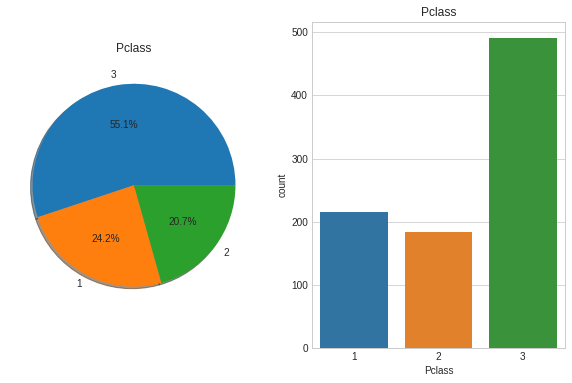

In [ ]:
piecount("Pclass")

In [ ]:
data.Name.value_counts()

Connolly, Miss. Kate                             2
Kelly, Mr. James                                 2
Weisz, Mrs. Leopold (Mathilde Francoise Pede)    1
Sivic, Mr. Husein                                1
Sheerlinck, Mr. Jan Baptist                      1
                                                ..
Ali, Mr. Ahmed                                   1
Icard, Miss. Amelie                              1
Henry, Miss. Delia                               1
Byles, Rev. Thomas Roussel Davids                1
Cor, Mr. Ivan                                    1
Name: Name, Length: 1307, dtype: int64

<a id = "구분 1"></a>
### data 사본

In [ ]:
temp = data.copy()
temp['Title'] = data.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
temp['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Sir           1
Jonkheer      1
Lady          1
Capt          1
Don           1
Dona          1
Mme           1
Countess      1
Name: Title, dtype: int64

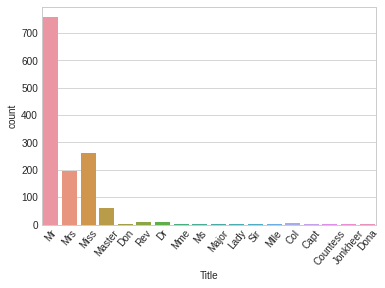

In [ ]:
g = sns.countplot(x="Title",data=temp)
g = plt.setp(g.get_xticklabels(),rotation=50)

In [ ]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Title')

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [ ]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


train.groupby(['Survived','Sex'])['Sex'].count() 와 비교하기

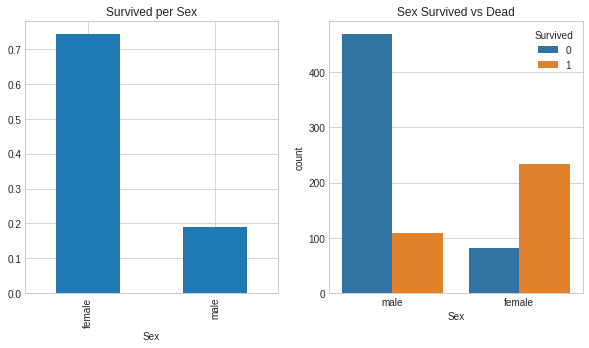

In [ ]:
def twobar(col, target, title, title1):
    f,ax=plt.subplots(1,2,figsize=(10,5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()

twobar('Sex','Survived','Survived per Sex','Sex Survived vs Dead')

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

남자의 수가 여자의 수보다 많지만, 생존율은 여성이 남성의 3배 이상이다.

In [ ]:
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
print('가장 나이가 많은 승객은', data['Age'].max(), '세 이다.')
print('가장 나이가 적은 승객은', data['Age'].min(), '세 이다.')
print('평균 나이는', int(data['Age'].mean()), '세 이다.')

가장 나이가 많은 승객은 80.0 세 이다.
가장 나이가 적은 승객은 0.17 세 이다.
평균 나이는 29 세 이다.


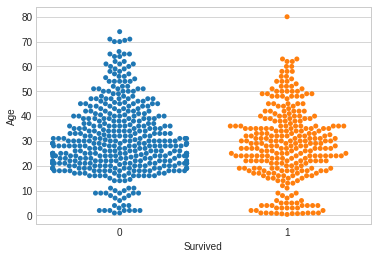

In [ ]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

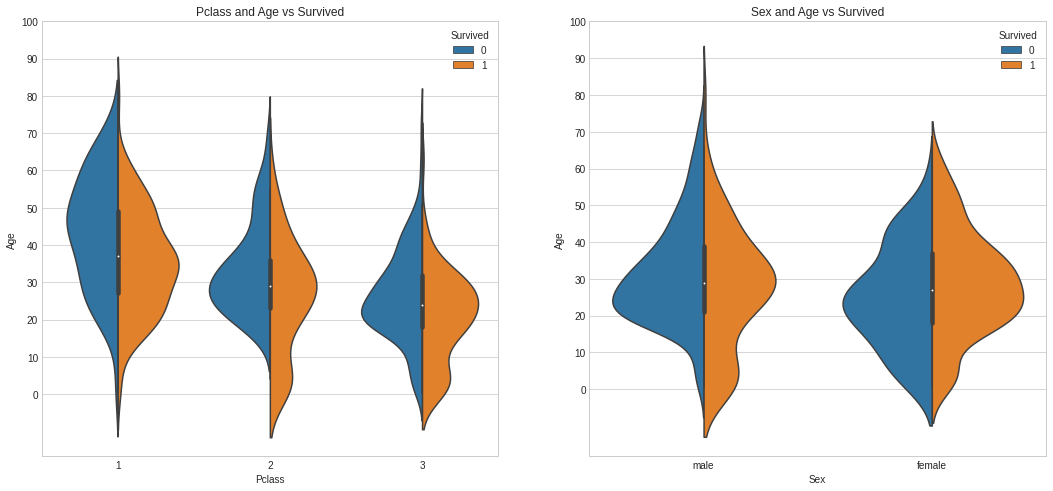

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex","Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

1) 10세 미만의 어린이 수는 Pclass 3등급으로 갈수록 증가하고, 생존율은 Pclass에 상관없이 양호하다.

2) 20-40세는 Pclass 1등급에서 생존율이 높고, 여성이 더 높다.

In [ ]:
#Title별 평균Age 구하기
temp.groupby('Title').agg({'Age': ['mean', 'count']})

Age      
               mean count
Title                    
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dona      39.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       36.994118   170
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [ ]:
temp = temp.reset_index(drop=True)
temp['Age'] = temp.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))
temp[55:60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
55,56,1.0,1,"Woolner, Mr. Hugh",male,32.252151,0,0,19947,35.5000,C52,S,Mr
56,57,1.0,2,"Rugg, Miss. Emily",female,21.000000,0,0,C.A. 31026,10.5000,NaN,S,Miss
57,58,0.0,3,"Novel, Mr. Mansouer",male,28.500000,0,0,2697,7.2292,NaN,C,Mr
58,59,1.0,2,"West, Miss. Constance Mirium",female,5.000000,1,2,C.A. 34651,27.7500,NaN,S,Miss
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,NaN,S,Master


In [ ]:
#Title 매핑
temp['Title'] = temp['Title'].replace(['Don','Rev','Major','Sir','Col','Capt','Countess','Jonkheer','Dona'], 'Rare')
temp['Title'] = temp['Title'].map({'Master':0, 'Dr':0, 'Mr':1, 'Mrs':2, 'Mme':2, 'Ms':2, 'Lady':2, 'Mlle':2, 'Miss':2, 'Rare':3})
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
survpct('Title')

Title
0    0.553191
1    0.156673
2    0.740385
3    0.266667
Name: Survived, dtype: float64

In [ ]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [ ]:
temp['Agroup'] = 0

temp.loc[(temp['Age'] < 1), 'Agroup'] = 0
temp.loc[(temp['Age'] >= 1) & (temp['Age'] < 16), 'Agroup'] = 1
temp.loc[(temp['Age'] >= 16) & (temp['Age'] < 21), 'Agroup'] = 2
temp.loc[(temp['Age'] >= 21) & (temp['Age'] < 23), 'Agroup'] = 3
temp.loc[(temp['Age'] >= 23) & (temp['Age'] < 26), 'Agroup'] = 4
temp.loc[(temp['Age'] >= 26) & (temp['Age'] < 30), 'Agroup'] = 5
temp.loc[(temp['Age'] >= 30) & (temp['Age'] < 32.252), 'Agroup'] = 6
temp.loc[(temp['Age'] >= 32.252) & (temp['Age'] < 33), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 33) & (temp['Age'] < 39), 'Agroup'] = 8
temp.loc[(temp['Age'] >= 39) & (temp['Age'] < 48), 'Agroup'] = 9
temp.loc[(temp['Age'] >= 48) & (temp['Age'] < 80), 'Agroup'] = 10

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(21.0, 23.0]",3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(33.0, 39.0]",8
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(23.0, 26.0]",5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(33.0, 39.0]",8
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(33.0, 39.0]",8


In [ ]:
#Sex 매핑
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [ ]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [ ]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1
temp['Family'] = temp['SibSp'] + temp['Parch'] + 1
temp.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,"(21.0, 23.0]",3,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,2,"(33.0, 39.0]",8,NaN,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(23.0, 26.0]",5,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,2,"(33.0, 39.0]",8,NaN,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,1,"(33.0, 39.0]",8,1.0,1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,1,"(30.0, 32.252]",7,1.0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,1,"(48.0, 80.0]",10,1.0,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,"(0.169, 16.0]",1,NaN,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,2,"(26.0, 30.0]",5,NaN,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,2,"(0.169, 16.0]",1,NaN,2


In [ ]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

(1) 혼자는 생존율이 낮다. 이는 혼자가 많은 젊은이들이 양보를 했다고 추측할 수 있다.    
(2) 가족이 4 명이상 있는 사람은 생존율이 낮다.

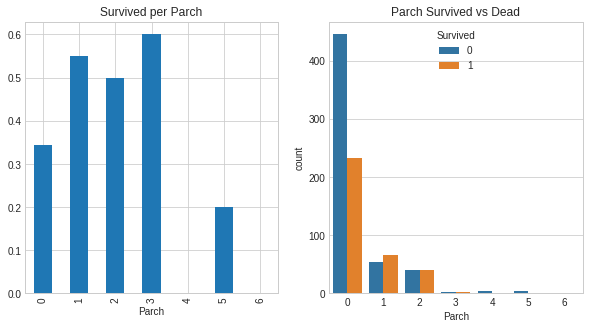

In [ ]:
twobar('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Dead')

부모가 1~3명 있는 사람은 생존율이 높다. 

In [ ]:
pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')

(1) Pclass 3등급으로 갈수록 식구가 많다.  
(2) 1~3명의 가족이 있는 귀족층은 생존율이 높다.

In [ ]:
temp.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [ ]:
temp.Ticket.isnull().any()

False

In [ ]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')
temp = temp.reset_index(drop=True)
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(21.0, 23.0]",3,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,2,"(33.0, 39.0]",8,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(23.0, 26.0]",5,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,2,"(33.0, 39.0]",8,NaN,2,NaN
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,"(33.0, 39.0]",8,1.0,1,NaN


In [ ]:
temp['NumTicket'] = temp['Initick'].factorize()[0]
temp.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,"(21.0, 23.0]",3,NaN,2,A,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,2,"(33.0, 39.0]",8,NaN,2,PC,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(23.0, 26.0]",5,1.0,1,STON,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,2,"(33.0, 39.0]",8,NaN,2,NaN,-1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,1,"(33.0, 39.0]",8,1.0,1,NaN,-1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,1,"(30.0, 32.252]",7,1.0,1,NaN,-1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,1,"(48.0, 80.0]",10,1.0,1,NaN,-1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,"(0.169, 16.0]",1,NaN,5,NaN,-1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,2,"(26.0, 30.0]",5,NaN,3,NaN,-1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,2,"(0.169, 16.0]",1,NaN,2,NaN,-1


In [ ]:
survpct('NumTicket')

NumTicket
-1     0.384266
 0     0.068966
 1     0.650000
 2     0.444444
 3     0.666667
 4     0.454545
 5     0.538462
 6     0.142857
 7     0.071429
 8     1.000000
 9     0.090909
 10    0.117647
 11    0.000000
 12    0.250000
 13    0.666667
 14    1.000000
 15    0.000000
 16    0.500000
 17    0.500000
 18         NaN
 19         NaN
Name: Survived, dtype: float64

In [ ]:
print('가장 높은 요금:', temp['Fare'].max())
print('가장 낮은 요금:', temp['Fare'].min())
print('평균요금:', temp['Fare'].mean())

가장 높은 요금: 512.3292
가장 낮은 요금: 0.0
평균요금: 33.2954792813456


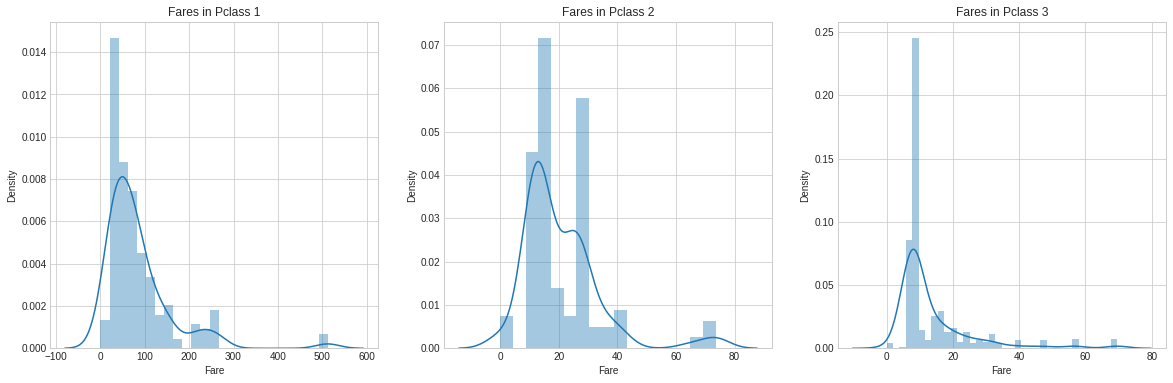

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(20, 6))
sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass'] == 2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass'] == 3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [ ]:
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 4)
groupmean('Fare_Range', 'Fare')

,Fare
Fare_Range,
"(-0.001, 7.91]",7.034172
"(7.91, 14.454]",10.386050
"(14.454, 31.0]",23.028677
"(31.0, 512.329]",88.677872


In [ ]:
survpct('Fare_Range')

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [ ]:
temp['Fgroup'] = 0

temp.loc[(temp['Fare'] < 7.91), 'Fgroup'] = 0
temp.loc[(temp['Fare'] >= 7.91) & (temp['Fare'] < 14.454), 'Fgroup'] = 1
temp.loc[(temp['Fare'] >= 14.454) & (temp['Fare'] < 31.0), 'Fgroup'] = 2
temp.loc[(temp['Fare'] >= 31.0) & (temp['Fare'] < 512.329), 'Fgroup'] = 3

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(21.0, 23.0]",3,NaN,2,A,0,"(-0.001, 7.91]",0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,2,"(33.0, 39.0]",8,NaN,2,PC,1,"(31.0, 512.329]",3
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(23.0, 26.0]",5,1.0,1,STON,2,"(7.91, 14.454]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,2,"(33.0, 39.0]",8,NaN,2,NaN,-1,"(31.0, 512.329]",3
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,"(33.0, 39.0]",8,1.0,1,NaN,-1,"(7.91, 14.454]",1


In [ ]:
temp.Cabin.value_counts().head(10)

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
C22 C26            4
C78                4
F2                 4
B96 B98            4
D                  4
F33                4
Name: Cabin, dtype: int64

In [ ]:
temp.Cabin.value_counts().tail(10)

D38            1
D40            1
B39            1
D50            1
C28            1
F              1
B52 B54 B56    1
D34            1
C70            1
C47            1
Name: Cabin, dtype: int64

In [ ]:
temp.Cabin.isna().any()

True

In [ ]:
temp.Cabin.isna().sum()

1014

In [ ]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[((temp['Cabin'].isna()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isna()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isna()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'
    
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(21.0, 23.0]",3,NaN,2,A,0,"(-0.001, 7.91]",0,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,2,"(33.0, 39.0]",8,NaN,2,PC,1,"(31.0, 512.329]",3,C
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(23.0, 26.0]",5,1.0,1,STON,2,"(7.91, 14.454]",1,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,2,"(33.0, 39.0]",8,NaN,2,NaN,-1,"(31.0, 512.329]",3,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,"(33.0, 39.0]",8,1.0,1,NaN,-1,"(7.91, 14.454]",1,Z


In [ ]:
survpct('Inicab')

Inicab
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
X    0.475000
Y    0.440476
Z    0.235908
Name: Survived, dtype: float64

In [ ]:
temp['Inicab'] = temp['Inicab'].factorize()[0]
temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,C103,S,2,"(48.0, 80.0]",10,1.0,1,NaN,-1,"(14.454, 31.0]",2,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,NaN,S,1,"(16.0, 21.0]",2,1.0,1,A,0,"(7.91, 14.454]",1,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,NaN,S,1,"(33.0, 39.0]",9,NaN,7,NaN,-1,"(31.0, 512.329]",3,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,NaN,S,2,"(0.169, 16.0]",1,1.0,1,NaN,-1,"(-0.001, 7.91]",0,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,NaN,S,2,"(48.0, 80.0]",10,1.0,1,NaN,-1,"(14.454, 31.0]",2,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,Q,0,"(0.169, 16.0]",1,NaN,6,NaN,-1,"(14.454, 31.0]",2,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,NaN,S,1,"(30.0, 32.252]",7,1.0,1,NaN,-1,"(7.91, 14.454]",1,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,NaN,S,2,"(30.0, 32.252]",6,NaN,2,NaN,-1,"(14.454, 31.0]",2,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,36.994118,0,0,2649,7.2250,NaN,C,2,"(33.0, 39.0]",8,1.0,1,NaN,-1,"(-0.001, 7.91]",0,0


In [ ]:
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

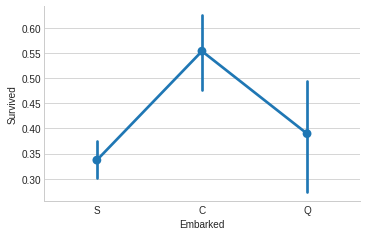

In [ ]:
sns.factorplot('Embarked', 'Survived', data=temp)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

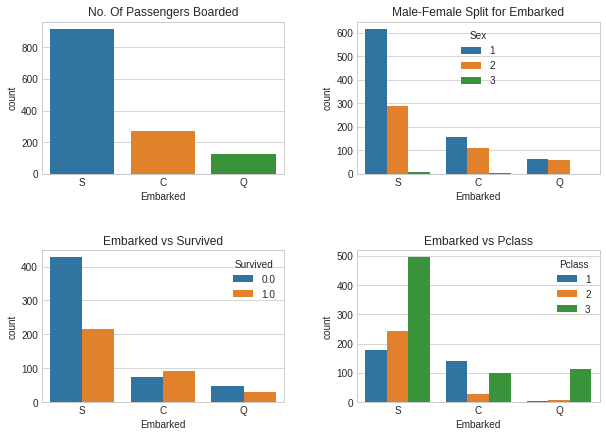

In [ ]:
f,ax=plt.subplots(2,2,figsize=(10,7))
sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show()

(1) Embarked C의 생존율은 가장 높다.   
(2) Embarked S의 생존율은 가장 낮고, 탑승자가 제일 많다.

In [ ]:
temp.loc[(temp.Embarked.isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,B28,NaN,2,"(33.0, 39.0]",8,1.0,1,NaN,-1,"(31.0, 512.329]",3,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,B28,NaN,2,"(48.0, 80.0]",10,1.0,1,NaN,-1,"(31.0, 512.329]",3,8


In [ ]:
temp.loc[temp['Ticket'] == 113572]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [ ]:
temp.sort_values(['Ticket'], ascending = True)[50:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
965,966,NaN,1,"Geiger, Miss. Amalie",2,35.000000,0,0,113503,211.5000,C130,C,2,"(33.0, 39.0]",8,1.0,1,NaN,-1,NaN,3,1
377,378,0.0,1,"Widener, Mr. Harry Elkins",1,27.000000,0,2,113503,211.5000,C82,C,1,"(26.0, 30.0]",5,NaN,3,NaN,-1,"(31.0, 512.329]",3,1
166,167,1.0,1,"Chibnall, Mrs. (Edith Martha Bowerman)",2,36.994118,0,1,113505,55.0000,E33,S,2,"(33.0, 39.0]",8,NaN,2,NaN,-1,"(31.0, 512.329]",3,2
356,357,1.0,1,"Bowerman, Miss. Elsie Edith",2,22.000000,0,1,113505,55.0000,E33,S,2,"(21.0, 23.0]",3,NaN,2,NaN,-1,"(31.0, 512.329]",3,2
917,918,NaN,1,"Ostby, Miss. Helene Ragnhild",2,22.000000,0,1,113509,61.9792,B36,C,2,"(21.0, 23.0]",3,NaN,2,NaN,-1,NaN,3,8
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",1,65.000000,0,1,113509,61.9792,B30,C,1,"(48.0, 80.0]",10,NaN,2,NaN,-1,"(31.0, 512.329]",3,8
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",1,32.252151,0,0,113510,35.0000,C128,S,1,"(30.0, 32.252]",7,1.0,1,NaN,-1,"(31.0, 512.329]",3,1
252,253,0.0,1,"Stead, Mr. William Thomas",1,62.000000,0,0,113514,26.5500,C87,S,1,"(48.0, 80.0]",10,1.0,1,NaN,-1,"(14.454, 31.0]",2,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.000000,0,0,113572,80.0000,B28,NaN,2,"(48.0, 80.0]",10,1.0,1,NaN,-1,"(31.0, 512.329]",3,8
61,62,1.0,1,"Icard, Miss. Amelie",2,38.000000,0,0,113572,80.0000,B28,NaN,2,"(33.0, 39.0]",8,1.0,1,NaN,-1,"(31.0, 512.329]",3,8


In [ ]:
temp.loc[(temp.Embarked.isna()), 'Embarked'] = 'S'

In [ ]:
temp['Embarked'] = temp['Embarked'].factorize()[0]
    
temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,C103,0,2,"(48.0, 80.0]",10,1.0,1,NaN,-1,"(14.454, 31.0]",2,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,NaN,0,1,"(16.0, 21.0]",2,1.0,1,A,0,"(7.91, 14.454]",1,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,NaN,0,1,"(33.0, 39.0]",9,NaN,7,NaN,-1,"(31.0, 512.329]",3,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,NaN,0,2,"(0.169, 16.0]",1,1.0,1,NaN,-1,"(-0.001, 7.91]",0,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,NaN,0,2,"(48.0, 80.0]",10,1.0,1,NaN,-1,"(14.454, 31.0]",2,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,2,0,"(0.169, 16.0]",1,NaN,6,NaN,-1,"(14.454, 31.0]",2,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,NaN,0,1,"(30.0, 32.252]",7,1.0,1,NaN,-1,"(7.91, 14.454]",1,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,NaN,0,2,"(30.0, 32.252]",6,NaN,2,NaN,-1,"(14.454, 31.0]",2,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,36.994118,0,0,2649,7.2250,NaN,1,2,"(33.0, 39.0]",8,1.0,1,NaN,-1,"(-0.001, 7.91]",0,0


In [ ]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [ ]:
survpct('Embarked')

Embarked
0    0.339009
1    0.553571
2    0.389610
Name: Survived, dtype: float64

In [ ]:
survpct('Title')

Title
0    0.553191
1    0.156673
2    0.740385
3    0.266667
Name: Survived, dtype: float64

In [ ]:
survpct('Agroup')

Agroup
0     1.000000
1     0.550000
2     0.340206
3     0.436782
4     0.371429
5     0.385542
6     0.435484
7     0.123967
8     0.509434
9     0.325843
10    0.409091
Name: Survived, dtype: float64

In [ ]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [ ]:
survpct('NumTicket')

NumTicket
-1     0.384266
 0     0.068966
 1     0.650000
 2     0.444444
 3     0.666667
 4     0.454545
 5     0.538462
 6     0.142857
 7     0.071429
 8     1.000000
 9     0.090909
 10    0.117647
 11    0.000000
 12    0.250000
 13    0.666667
 14    1.000000
 15    0.000000
 16    0.500000
 17    0.500000
 18         NaN
 19         NaN
Name: Survived, dtype: float64

In [ ]:
temp.loc[temp['NumTicket'] == 18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
1147,1148,NaN,3,"Mahon, Mr. John",1,32.252151,0,0,AQ/4 3130,7.7500,NaN,2,1,"(30.0, 32.252]",7,1.0,1,AQ,18,NaN,0,0
1206,1207,NaN,3,"Hagardon, Miss. Kate",2,17.000000,0,0,AQ/3. 30631,7.7333,NaN,2,2,"(16.0, 21.0]",2,1.0,1,AQ,18,NaN,0,0


In [ ]:
survpct('Fgroup')

Fgroup
0    0.207965
1    0.308756
2    0.442478
3    0.576577
Name: Survived, dtype: float64

In [ ]:
survpct('Inicab')

Inicab
0     0.235908
1     0.593220
2     0.750000
3     0.440476
4     0.500000
5     0.757576
6     0.466667
7     0.475000
8     0.744681
9     0.615385
10    0.000000
Name: Survived, dtype: float64

<a id = '2차정리 시작'></a>
###2차 feature engineering 시작

In [ ]:
temp['Age*Class'] = temp.Agroup * temp.Pclass
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Age*Class
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,"(21.0, 23.0]",3,NaN,2,A,0,"(-0.001, 7.91]",0,0,9
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,2,"(33.0, 39.0]",8,NaN,2,PC,1,"(31.0, 512.329]",3,1,8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(23.0, 26.0]",5,1.0,1,STON,2,"(7.91, 14.454]",1,0,15
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0,2,"(33.0, 39.0]",8,NaN,2,NaN,-1,"(31.0, 512.329]",3,1,8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,"(33.0, 39.0]",8,1.0,1,NaN,-1,"(7.91, 14.454]",1,0,24


In [ ]:
survpct('Age*Class')

Age*Class
0     1.000000
1     0.800000
2     0.903226
3     0.455882
4     0.586207
5     0.615385
6     0.333333
7     0.250000
8     0.656250
9     0.417476
10    0.500000
12    0.280000
14    0.272727
15    0.297872
16    0.423077
18    0.372549
20    0.333333
21    0.077778
24    0.250000
27    0.081081
30    0.071429
Name: Survived, dtype: float64

In [ ]:
temp['Age*Class'].value_counts()

9     162
21    137
6     125
10    124
3      93
8      87
12     82
18     71
15     70
24     62
4      47
27     47
2      42
16     32
20     29
7      28
5      20
30     16
14     15
0      13
1       7
Name: Age*Class, dtype: int64

In [ ]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Age*Class
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,"(21.0, 23.0]",3,NaN,2,A,0,"(-0.001, 7.91]",0,0,9
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,2,"(33.0, 39.0]",8,NaN,2,PC,1,"(31.0, 512.329]",3,1,8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(23.0, 26.0]",5,1.0,1,STON,2,"(7.91, 14.454]",1,0,15
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0,2,"(33.0, 39.0]",8,NaN,2,NaN,-1,"(31.0, 512.329]",3,1,8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,"(33.0, 39.0]",8,1.0,1,NaN,-1,"(7.91, 14.454]",1,0,24


<a id= '중요변수 추출'></a>
###중요변수 추출

In [ ]:
temp['F1'] = temp['Pclass']
temp['F2'] = temp['Sex']
temp['F3'] = temp['Embarked']
temp['F4'] = temp['Title']
temp['F5'] = temp['Agroup']
temp['F6'] = temp['Family']
temp['F7'] = temp['NumTicket']
temp['F8'] = temp['Fgroup']
temp['F9'] = temp['Inicab']
temp['F10'] = temp['Age*Class']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
df = pd.DataFrame()

In [ ]:
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']
df[good_columns] = temp[good_columns]

In [ ]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,3,1,0,1,3,2,0,0,0,9
1,1,2,1,2,8,2,1,3,1,8
2,3,2,0,2,5,1,2,1,0,15
3,1,2,0,2,8,2,-1,3,1,8
4,3,1,0,1,8,1,-1,1,0,24


In [ ]:
#LabelEncoder
dfl_enc = df.apply(LabelEncoder().fit_transform)
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,2,0,0,1,3,1,1,0,0,9
1,0,1,1,2,8,1,2,3,1,8
2,2,1,0,2,5,0,3,1,0,13
3,0,1,0,2,8,1,0,3,1,8
4,2,0,0,1,8,0,0,1,0,18


In [ ]:
#OneHotEncoder
one_hot_cols = df.columns.tolist()
dfh_enc = pd.get_dummies(df, columns=one_hot_cols)
dfh_enc.head()

,F1_1,F1_2,F1_3,F2_1,F2_2,F2_3,F3_0,F3_1,F3_2,F4_0,F4_1,F4_2,F4_3,F5_0,F5_1,F5_2,F5_3,F5_4,F5_5,F5_6,F5_7,F5_8,F5_9,F5_10,F6_1,F6_2,F6_3,F6_4,F6_5,F6_6,F6_7,F6_8,F6_11,F7_-1,F7_0,F7_1,F7_2,F7_3,F7_4,F7_5,...,F7_16,F7_17,F7_18,F7_19,F8_0,F8_1,F8_2,F8_3,F9_0,F9_1,F9_2,F9_3,F9_4,F9_5,F9_6,F9_7,F9_8,F9_9,F9_10,F10_0,F10_1,F10_2,F10_3,F10_4,F10_5,F10_6,F10_7,F10_8,F10_9,F10_10,F10_12,F10_14,F10_15,F10_16,F10_18,F10_20,F10_21,F10_24,F10_27,F10_30
0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<a id = "머신러닝 시작"></a>
###머신러닝 시작

In [ ]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [ ]:
X_train = train
X_test = test

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

#교차 검증
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

In [ ]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
SVC,0.822222,0.853933,0.775281,0.853933,0.853933,0.797753,0.831461,0.786517,0.820225,0.842697,0.823795
XGBoost,0.800000,0.808989,0.764045,0.876404,0.865169,0.786517,0.808989,0.775281,0.831461,0.865169,0.818202
Gradient Boosting,0.800000,0.808989,0.775281,0.853933,0.831461,0.775281,0.831461,0.786517,0.831461,0.865169,0.815955
Random Forest,0.777778,0.831461,0.752809,0.831461,0.842697,0.842697,0.842697,0.730337,0.831461,0.820225,0.810362
AdaBoost,0.811111,0.831461,0.797753,0.820225,0.820225,0.752809,0.786517,0.808989,0.853933,0.820225,0.810325
Extra Trees,0.755556,0.842697,0.741573,0.820225,0.842697,0.820225,0.820225,0.741573,0.865169,0.820225,0.807016
Logistic Regression,0.822222,0.797753,0.797753,0.808989,0.820225,0.775281,0.797753,0.820225,0.820225,0.808989,0.806941
Bagging Classifier,0.788889,0.797753,0.730337,0.853933,0.820225,0.820225,0.820225,0.752809,0.808989,0.842697,0.803608
K Nearest Neighbour,0.733333,0.752809,0.730337,0.820225,0.741573,0.730337,0.820225,0.775281,0.786517,0.775281,0.766592
Gaussian Process,0.766667,0.752809,0.719101,0.786517,0.764045,0.730337,0.764045,0.786517,0.797753,0.741573,0.760936


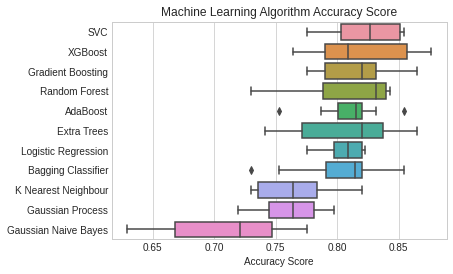

In [ ]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score')
plt.xlabel('Accuracy Score');

In [ ]:
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

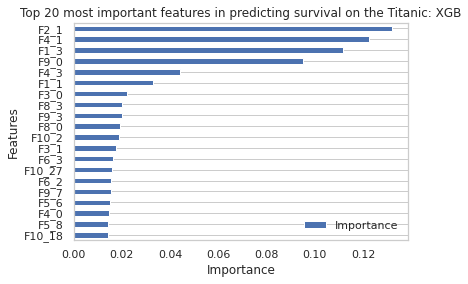

In [ ]:
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
title = 'Top 20 most important features in predicting survival on the Titanic: XGB'
importance_plotting(importance, 'Importance', 'Features', title, 20)

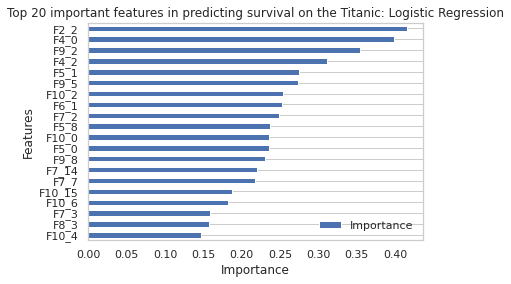

In [ ]:
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
title = 'Top 20 important features in predicting survival on the Titanic: Logistic Regression'
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [ ]:
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')
importances['Average'] = importances.mean(axis=1)
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

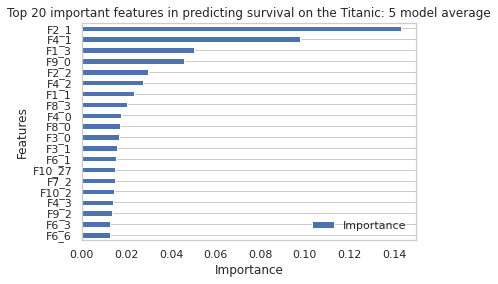

In [ ]:
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

title = 'Top 20 important features in predicting survival on the Titanic: 5 model average'
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [ ]:
importance1 = importance[-70:]
importance1[60:70]

,Importance
Features,
F8_0,0.017249
F4_0,0.017834
F8_3,0.020275
F1_1,0.023612
F4_2,0.027512
F2_2,0.029558
F9_0,0.046033
F1_3,0.050386
F4_1,0.097928


In [ ]:
mylist = list(importance1.index)

In [ ]:
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i]= test[i]
    
train1.head()

,F5_3,F5_2,F10_12,F10_21,F5_0,F5_7,F9_10,F1_2,F6_8,F7_3,F10_30,F6_11,F5_10,F10_16,F7_12,F6_4,F10_1,F6_7,F10_0,F5_5,F5_1,F7_14,F10_18,F9_1,F7_9,F10_10,F7_6,F3_2,F10_5,F10_24,F10_15,F5_9,F10_8,F5_4,F9_8,F10_9,F7_1,F7_4,F9_4,F7_-1,F6_2,F9_7,F8_1,F5_8,F9_3,F9_5,F8_2,F7_7,F5_6,F6_5,F6_6,F6_3,F9_2,F4_3,F10_2,F7_2,F10_27,F6_1,F3_1,F3_0,F8_0,F4_0,F8_3,F1_1,F4_2,F2_2,F9_0,F1_3,F4_1,F2_1
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1


In [ ]:
train = train1
test = test1

X_train = train
X_test = test

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores2[model_names[ind]] = acc

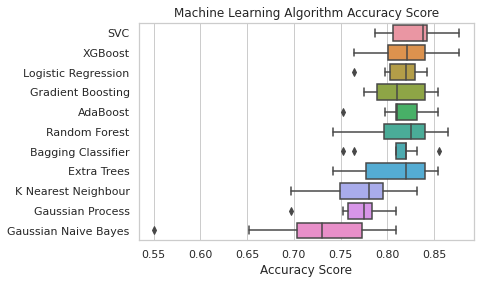

In [ ]:
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score')
plt.xlabel('Accuracy Score');

<a id = "하이퍼파라미터 튜닝"></a>
###하이퍼파라미터 튜닝

### SVC

In [ ]:
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

hyperparams = {'C': Cs, 'gamma' : gammas}

gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.8s finished


0.8305065595380077
{'C': 1, 'gamma': 0.01}


### Gradient Boosting Classifier

In [ ]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.7min finished


0.8260247316552632
{'learning_rate': 0.05, 'n_estimators': 1000}


### Logistic Regression

In [ ]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8148201619484026
{'C': 21.544346900318832, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


### XGBoost



In [ ]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.1s


0.8338773460548616
{'learning_rate': 0.2, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   57.9s finished


In [ ]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.0s


0.8170673529596385
{'max_depth': 4, 'min_child_weight': 2}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.3s finished


In [ ]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8114682066411399
{'gamma': 0.0}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


In [ ]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.9s


0.8271671583704727
{'colsample_bytree': 0.9, 'subsample': 0.75}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   10.5s finished


In [ ]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8125980792166217
{'reg_alpha': 1}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


### Gaussian Process

In [ ]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   47.0s finished


0.7631724311091582
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': False}


### Adaboost.

In [ ]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   52.2s finished


0.8170673529596385
{'learning_rate': 1, 'n_estimators': 500}


### KNN

In [ ]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.4s


0.7878789780930262
{'algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 5, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.2s finished


### Random Forest.

In [ ]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   49.6s


0.8305316678174627
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.6min finished


### Extra Trees

In [ ]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   52.6s


0.8350134957002071
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   56.5s finished


### Bagging Classifier

In [ ]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:  1.4min


0.8294143493817087
{'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  1.7min finished


<a id = "모델 재트레이닝"></a>
###모델 재 트레이닝

In [ ]:
ran = RandomForestClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=1)

knn = KNeighborsClassifier(leaf_size=1, n_neighbors=4, weights='distance')

log = LogisticRegression(C=2.7825594022071245, penalty='l2')

xgb = XGBClassifier(learning_rate=0.1, n_estimators=10, max_depth=7, 
                                          min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1, reg_alpha=1e-05)

gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000)

svc = SVC(probability=True, gamma=0.001, C=5)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, random_state=1)

ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)

bag = BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=75, random_state=1)

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}

for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores3[model_names[ind]] = acc

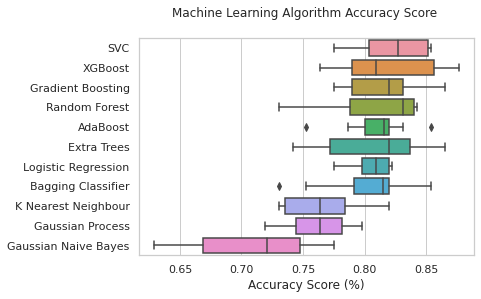

In [ ]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)


result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

<a id = "마지막 보팅"></a>
###마지막 보팅

In [ ]:
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 83.61


In [ ]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: 82.72


<a id = "예측"></a>
###예측하기

In [ ]:
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission1.csv', header = True, index = False)

In [ ]:
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission2.csv', header = True, index = False)